### **1.  Training data (ChatGPT)**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
gpt = pd.read_csv("gpt.csv", encoding="utf-8")
gpt

,contents,star
0,Love the new update! The interface is much mor...,5.0
1,App keeps crashing after the recent update.,1.0
2,"It's okay, but I've seen better.",3.0
3,"I don't know why everyone is complaining, work...",5.0
4,The ads are so annoying.,2.0
...,...,...
24594,Horrible. I'm uninstalling it right now.,1.0
24595,Didn't live up to the expectations at all.,1.0
24596,The new update ruined everything. I liked the ...,2.0
24597,"It was okay initially, but now it's full of bugs.",2.0


In [4]:
gpt.drop_duplicates()
gpt.reset_index(drop=True, inplace=True)

<Axes: xlabel='star', ylabel='count'>

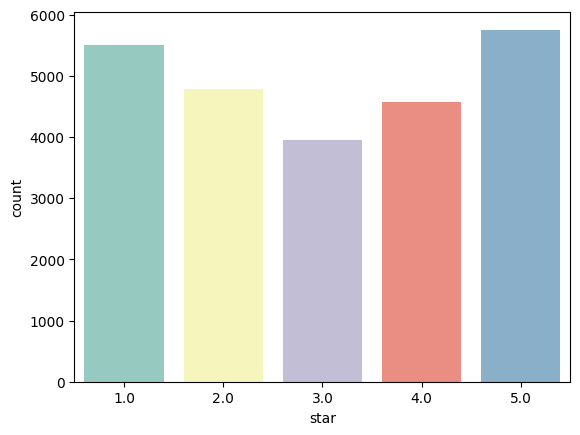

In [5]:
sns.countplot(x = "star", data = gpt, palette = "Set3")

In [6]:
gpt['star'] = gpt['star'].replace(1, 0)
gpt['star'] = gpt['star'].replace(2, 0)
gpt['star'] = gpt['star'].replace(3, 99)
gpt['star'] = gpt['star'].replace(4, 1)
gpt['star'] = gpt['star'].replace(5, 1)

one = gpt.loc[gpt['star'] == 0]
two = gpt.loc[gpt['star'] == 1]

gpt_data = pd.concat([one, two])
gpt_data = gpt_data.iloc[:,0:2]

gpt_data.to_csv('gpt_data.csv', header=['contents', 'star'], index=None)
gpt_data.index = range(len(gpt_data))
gpt_data = sklearn.utils.shuffle(gpt_data).reset_index(drop=True)
gpt_data

,contents,star
0,Regular updates show a commitment to user sati...,1.0
1,Unbeatable platform!,1.0
2,"Paid for a movie, but it stopped playing halfw...",0.0
3,App navigation feels clunky and outdated.,0.0
4,Customization options for playlists and recomm...,1.0
...,...,...
20629,Graphics and animations are impressive. Well d...,1.0
20630,Search results are often unrelated to the keyw...,0.0
20631,Total rip-off! Don't waste your money.,0.0
20632,"Recently, the app crashes whenever I try to wa...",0.0


<Axes: xlabel='star', ylabel='count'>

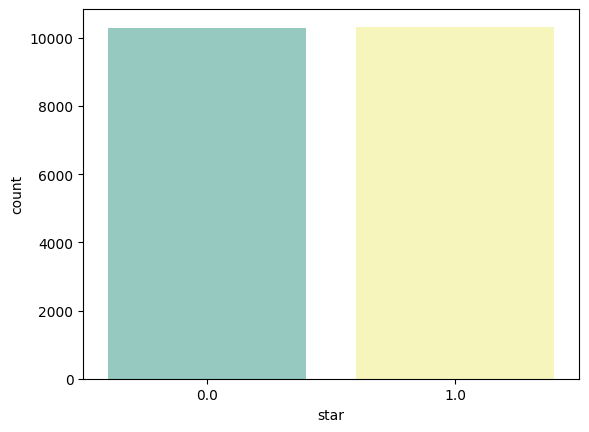

In [7]:
sns.countplot(x="star", data=gpt_data, palette="Set3")

### **2. Training model**

In [8]:
stopwords_object = stopwords.words('english')

def preprocessing_text(data):
    if type(data) is float:
      data = str(data);

    data = data.lower()
    data = re.sub("[^a-zA-Z]"," ", data)

    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords_object]


    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)

In [9]:
gpt_data['contents'] = gpt_data['contents'].apply(preprocessing_text)

In [10]:
tfidf = TfidfVectorizer()

In [11]:
X = gpt_data['contents']
y = gpt_data['star']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [12]:
X_train = tfidf.fit_transform(X_train)

In [13]:
X_test = tfidf.transform(X_test)

**1) Naive Bayes**

Training accuracy :  0.9317259344520507
Testing accuracy :  0.9205233826023747


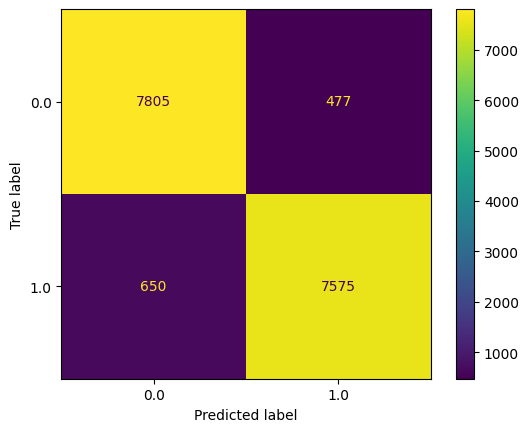

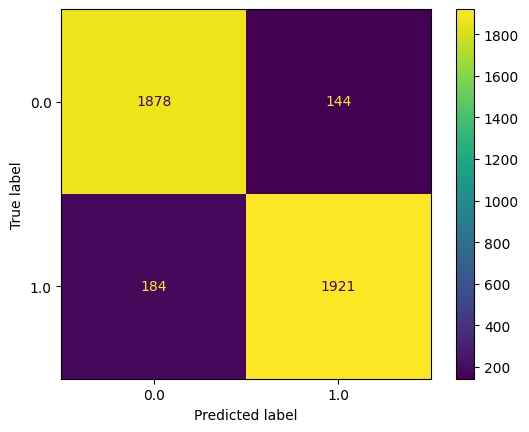

In [14]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_nb_train_pred = nb.predict(X_train)
y_nb_pred = nb.predict(X_test)

print("Training accuracy : ", nb.score(X_train, y_train))
print("Testing accuracy : ", nb.score(X_test, y_test))
matrix_nb = ConfusionMatrixDisplay(confusion_matrix(y_train, y_nb_train_pred), display_labels=nb.classes_)
matrix_nb2= ConfusionMatrixDisplay(confusion_matrix(y_test, y_nb_pred), display_labels=nb.classes_)
matrix_nb.plot()
plt.show()
matrix_nb2.plot()
plt.show()

**2) RandomForest**

Training accuracy :  0.9977585266856485
Testing accuracy :  0.9275502786527744


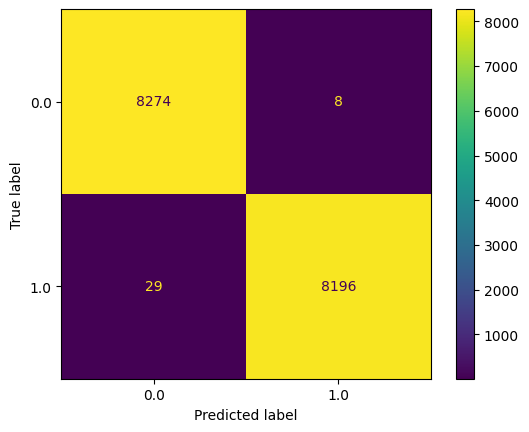

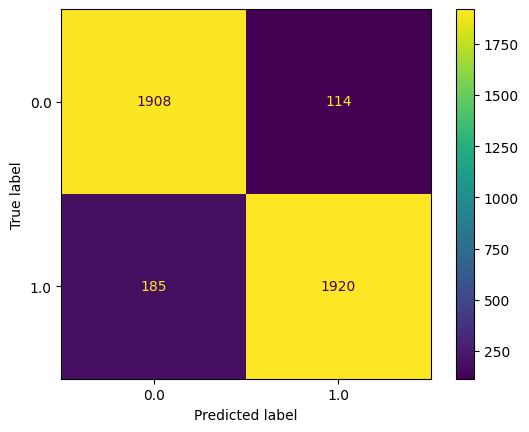

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_pred = rf.predict(X_test)

print("Training accuracy : ", rf.score(X_train, y_train))
print("Testing accuracy : ", rf.score(X_test, y_test))
matrix_rf = ConfusionMatrixDisplay(confusion_matrix(y_train, y_rf_train_pred), display_labels=rf.classes_)
matrix_rf2= ConfusionMatrixDisplay(confusion_matrix(y_test, y_rf_pred), display_labels=rf.classes_)
matrix_rf.plot()
plt.show()
matrix_rf2.plot()
plt.show()

**3) XGBoost**

Training accuracy :  0.9283334343005998
Testing accuracy :  0.9006542282529683


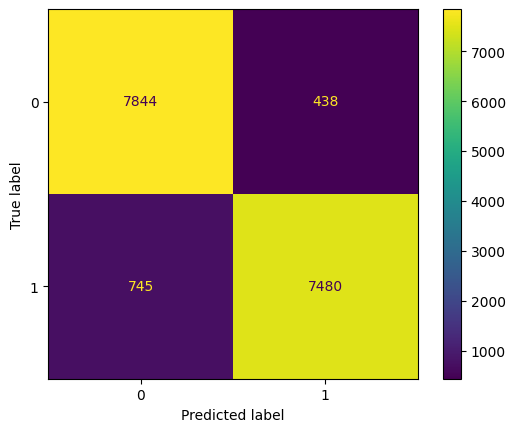

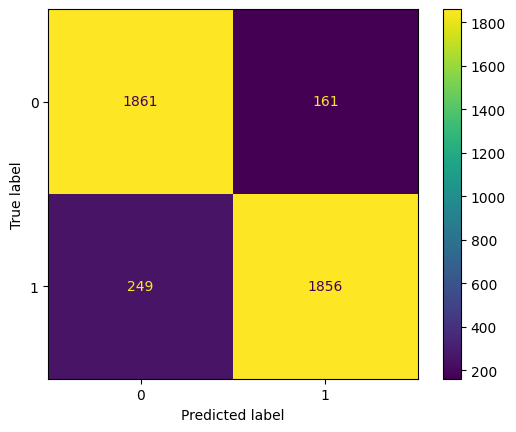

In [16]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb_train_pred = xgb.predict(X_train)
y_xgb_pred = xgb.predict(X_test)

print("Training accuracy : ", xgb.score(X_train, y_train))
print("Testing accuracy : ", xgb.score(X_test, y_test))
matrix_xgb = ConfusionMatrixDisplay(confusion_matrix(y_train, y_xgb_train_pred), display_labels=xgb.classes_)
matrix_xgb2= ConfusionMatrixDisplay(confusion_matrix(y_test, y_xgb_pred), display_labels=xgb.classes_)
matrix_xgb.plot()
plt.show()
matrix_xgb2.plot()
plt.show()

**4) Voting**

Training accuracy :  0.9783728115345005
Testing accuracy :  0.9391810031499879


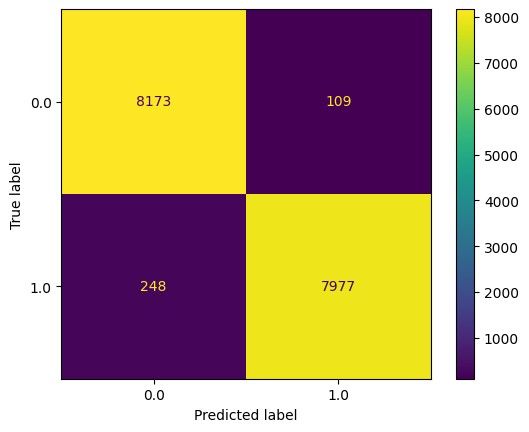

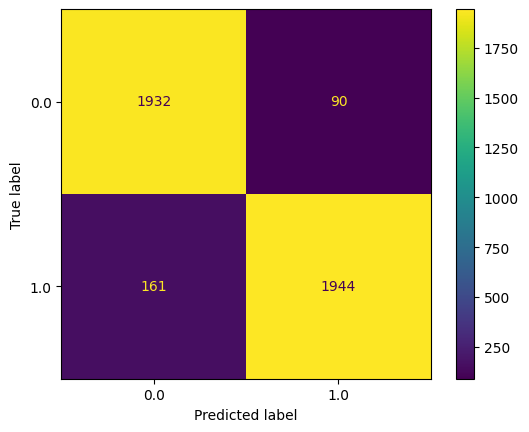

In [17]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('xgb', xgb)], voting='soft')
ensemble.fit(X_train, y_train)

ensemble_train_pred = ensemble.predict(X_train)
ensemble_pred = ensemble.predict(X_test)

print("Training accuracy : ", ensemble.score(X_train, y_train))
print("Testing accuracy : ", ensemble.score(X_test, y_test))
matrix_ensemble = ConfusionMatrixDisplay(confusion_matrix(y_train, ensemble_train_pred), display_labels=ensemble.classes_)
matrix_ensemble2= ConfusionMatrixDisplay(confusion_matrix(y_test, ensemble_pred), display_labels=ensemble.classes_)
matrix_ensemble.plot()
plt.show()
matrix_ensemble2.plot()
plt.show()

### **3. Predicting data (App)**

In [18]:
!pip install google-play-scraper

In [19]:
from google_play_scraper import Sort, reviews_all
import csv

**App 1 : ChatGPT**

In [20]:
raw_data1 = reviews_all(
   'com.openai.chatgpt',
   lang='en',
   country='us',
   sort=Sort.MOST_RELEVANT)

In [21]:
data_li1 = [(info['content'], info['score']) for info in raw_data1]
with open("ChatGPT.csv", 'wt', encoding='utf-8', newline='') as file:
  csv_writer = csv.writer(file)
  csv_writer.writerow(["contents", "star"])

  for data in data_li1:
    csv_writer.writerow(data)

In [22]:
app1 = pd.read_csv("ChatGPT.csv")
app1.drop_duplicates()
app1.reset_index(drop=True, inplace=True)
app1["contents"] = app1["contents"].apply(preprocessing_text)
app1 = app1[app1["contents"] != ""]
X1 = app1["contents"]
X1 = tfidf.transform(X1)

In [23]:
nb_pred1 = nb.predict(X1)
rf_pred1 = rf.predict(X1)
xgb_pred1 = xgb.predict(X1)
ensemble_pred1 = ensemble.predict(X1)

print("App 1 : ChatGPT")
print("Actual       : ", round(sum(app1["star"])/len(app1["star"]),1))
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred1)/len(nb_pred1)*4 + 1))
print("RandomForest : ", str(sum(rf_pred1)/len(rf_pred1)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred1)/len(xgb_pred1)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred1)/len(ensemble_pred1)*4 + 1))

App 1 : ChatGPT
Actual       :  4.4
-----------------------------------
Naive Bayes  :  3.8472064224656286
RandomForest :  3.4771995969707805
XGBoost      :  3.555985308934898
Ensemble     :  3.727987779113986


**App 2 : Viking_Rise**

In [25]:
raw_data2 = reviews_all(
   'com.igg.android.vikingriseglobal',
   lang='en',
   country='us',
   sort=Sort.MOST_RELEVANT)

In [26]:
data_li2 = [(info['content'], info['score']) for info in raw_data2]
with open("Viking_Rise.csv", 'wt', encoding='utf-8', newline='') as file:
  csv_writer = csv.writer(file)
  csv_writer.writerow(["contents", "star"])

  for data in data_li2:
    csv_writer.writerow(data)

In [27]:
app2 = pd.read_csv("Viking_Rise.csv")
app2.drop_duplicates()
app2.reset_index(drop=True, inplace=True)
app2["contents"] = app2["contents"].apply(preprocessing_text)
app2 = app2[app2["contents"] != ""]
X2 = app2["contents"]
X2 = tfidf.transform(X2)

In [28]:
nb_pred2 = nb.predict(X2)
rf_pred2 = rf.predict(X2)
xgb_pred2 = xgb.predict(X2)
ensemble_pred2 = ensemble.predict(X2)

print("[App 2] Viking_Rise")
print("Actual       : ", round(sum(app2["star"])/len(app2["star"]),1))
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred2)/len(nb_pred2)*4 + 1))
print("RandomForest : ", str(sum(rf_pred2)/len(rf_pred2)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred2)/len(xgb_pred2)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred2)/len(ensemble_pred2)*4 + 1))

[App 2] Viking_Rise
Actual       :  4.4
-----------------------------------
Naive Bayes  :  3.976169461606355
RandomForest :  3.5304036791006643
XGBoost      :  3.7323825893064524
Ensemble     :  3.8652390021833045


**App 3 : One_Star_App**

In [29]:
raw_data3 = reviews_all(
   'com.curiositycurve.www.theonestarapp',
   lang='en',
   country='us',
   sort=Sort.MOST_RELEVANT)

In [30]:
data_li3 = [(info['content'], info['score']) for info in raw_data3]
with open("One_Star_App.csv", 'wt', encoding='utf-8', newline='') as file:
  csv_writer = csv.writer(file)
  csv_writer.writerow(["contents", "star"])

  for data in data_li3:
    csv_writer.writerow(data)

In [31]:
app3 = pd.read_csv("One_Star_App.csv")
app3.drop_duplicates()
app3.reset_index(drop=True, inplace=True)
app3["contents"] = app3["contents"].apply(preprocessing_text)
app3 = app3[app3["contents"] != ""]
X3 = app3["contents"]
X3 = tfidf.transform(X3)

In [32]:
nb_pred3 = nb.predict(X3)
rf_pred3 = rf.predict(X3)
xgb_pred3 = xgb.predict(X3)
ensemble_pred3 = ensemble.predict(X3)

print("App 3 : One_Star_App")
print("Actual       : ", round(sum(app3["star"])/len(app3["star"]),1))
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred3)/len(nb_pred3)*4 + 1))
print("RandomForest : ", str(sum(rf_pred3)/len(rf_pred3)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred3)/len(xgb_pred3)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred3)/len(ensemble_pred3)*4 + 1))

App 3 : One_Star_App
Actual       :  1.5
-----------------------------------
Naive Bayes  :  2.0206766917293235
RandomForest :  2.0050125313283207
XGBoost      :  2.2017543859649122
Ensemble     :  1.9918546365914787


**App 4 : Bin_File_Opener_Viewer**

In [33]:
raw_data4 = reviews_all(
   'bin.file.opener',
   lang='en',
   country='us',
   sort=Sort.MOST_RELEVANT)

In [34]:
data_li4 = [(info['content'], info['score']) for info in raw_data4]
with open("Bin_File_Opener_Viewer.csv", 'wt', encoding='utf-8', newline='') as file:
  csv_writer = csv.writer(file)
  csv_writer.writerow(["contents", "star"])

  for data in data_li4:
    csv_writer.writerow(data)

In [35]:
app4 = pd.read_csv("Bin_File_Opener_Viewer.csv")
app4.drop_duplicates()
app4.reset_index(drop=True, inplace=True)
app4["contents"] = app4["contents"].apply(preprocessing_text)
app4 = app4[app4["contents"] != ""]
X4 = app4["contents"]
X4 = tfidf.transform(X4)

In [36]:
nb_pred4 = nb.predict(X4)
rf_pred4 = rf.predict(X4)
xgb_pred4 = xgb.predict(X4)
ensemble_pred4 = ensemble.predict(X4)

print("[App 4] Bin_File_Opener_Viewer")
print("Actual       : ", round(sum(app4["star"])/len(app4["star"]),1))
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred4)/len(nb_pred4)*4 + 1))
print("RandomForest : ", str(sum(rf_pred4)/len(rf_pred4)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred4)/len(xgb_pred4)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred4)/len(ensemble_pred4)*4 + 1))

[App 4] Bin_File_Opener_Viewer
Actual       :  1.7
-----------------------------------
Naive Bayes  :  1.7644444444444445
RandomForest :  1.462222222222222
XGBoost      :  1.7111111111111112
Ensemble     :  1.5866666666666667


**Youtube 1 : Training AI to Play Pokemon with Reinforcement Learning (General Video)**

In [37]:
!pip install google-api-python-client

In [38]:
from googleapiclient.discovery import build
import pandas as pd
def save_youtube_comment(file_name, data_frame):
    df2 = pd.DataFrame(comments, columns=["contents"])
    df2.to_csv(file_name, header=['contents'], index=None)

In [39]:
api_key="..." # 개인 정보
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId="DcYLT37ImBY", maxResults=100).execute()

while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay']])

    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId="DcYLT37ImBY", pageToken=response['nextPageToken'], maxResults=100).execute()

    else:
        break

save_youtube_comment('youtube_general_1.csv', comments)

In [40]:
youtube_positive = pd.read_csv("youtube_general_1.csv")
youtube_positive.drop_duplicates()
youtube_positive.reset_index(drop=True, inplace=True)
youtube_positive["contents"] = youtube_positive["contents"].apply(preprocessing_text)
youtube_positive = youtube_positive[youtube_positive["contents"] != ""]
X5 = youtube_positive["contents"]
X5 = tfidf.transform(X5)

In [41]:
nb_pred5 = nb.predict(X5)
rf_pred5 = rf.predict(X5)
xgb_pred5 = xgb.predict(X5)
ensemble_pred5 = ensemble.predict(X5)

print("[Youtube] Training AI to Play Pokemon with Reinforcement Learning")
print("https://www.youtube.com/watch?v=DcYLT37ImBY")
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred5)/len(nb_pred5)*4 + 1))
print("RandomForest : ", str(sum(rf_pred5)/len(rf_pred5)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred5)/len(xgb_pred5)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred5)/len(ensemble_pred5)*4 + 1))

[Youtube] Training AI to Play Pokemon with Reinforcement Learning
https://www.youtube.com/watch?v=DcYLT37ImBY
-----------------------------------
Naive Bayes  :  3.7417913347581115
RandomForest :  3.1418301923450556
XGBoost      :  2.983291237614144
Ensemble     :  3.329123761414416


**Youtube 2 : Reinforcement Learning from scratch (General Video)**

In [42]:
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId="vXtfdGphr3c", maxResults=100).execute()

while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay']])

    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId="vXtfdGphr3c", pageToken=response['nextPageToken'], maxResults=100).execute()

    else:
        break

save_youtube_comment('youtube_general_2.csv', comments)

In [43]:
youtube_positive = pd.read_csv("youtube_general_2.csv")
youtube_positive.drop_duplicates()
youtube_positive.reset_index(drop=True, inplace=True)
youtube_positive["contents"] = youtube_positive["contents"].apply(preprocessing_text)
youtube_positive = youtube_positive[youtube_positive["contents"] != ""]
X5 = youtube_positive["contents"]
X5 = tfidf.transform(X5)

In [44]:
nb_pred5 = nb.predict(X5)
rf_pred5 = rf.predict(X5)
xgb_pred5 = xgb.predict(X5)
ensemble_pred5 = ensemble.predict(X5)

print("[Youtube] Reinforcement Learning from scratch")
print("https://www.youtube.com/watch?v=vXtfdGphr3c")
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred5)/len(nb_pred5)*4 + 1))
print("RandomForest : ", str(sum(rf_pred5)/len(rf_pred5)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred5)/len(xgb_pred5)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred5)/len(ensemble_pred5)*4 + 1))

[Youtube] Reinforcement Learning from scratch
https://www.youtube.com/watch?v=vXtfdGphr3c
-----------------------------------
Naive Bayes  :  4.428571428571429
RandomForest :  4.428571428571429
XGBoost      :  4.428571428571429
Ensemble     :  4.714285714285714


**Youtube 3 : Israel intensifies retaliation after massive Hamas terror attack (Negative Video)**


In [45]:
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId="SZ6G6MWe6IQ", maxResults=100).execute()

while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay']])

    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId="SZ6G6MWe6IQ", pageToken=response['nextPageToken'], maxResults=100).execute()

    else:
        break

save_youtube_comment('youtube_negative_1.csv', comments)

In [46]:
youtube_negative = pd.read_csv("youtube_negative_1.csv")
youtube_negative.drop_duplicates()
youtube_negative.reset_index(drop=True, inplace=True)
youtube_negative["contents"] = youtube_negative["contents"].apply(preprocessing_text)
youtube_negative = youtube_negative[youtube_negative["contents"] != ""]
X6 = youtube_negative["contents"]
X6 = tfidf.transform(X6)

In [47]:
nb_pred6 = nb.predict(X6)
rf_pred6 = rf.predict(X6)
xgb_pred6 = xgb.predict(X6)
ensemble_pred6 = ensemble.predict(X6)

print("[Youtube] Israel intensifies retaliation after massive Hamas terror attack")
print("https://www.youtube.com/watch?v=SZ6G6MWe6IQ&t=57s")
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred6)/len(nb_pred6)*4 + 1))
print("RandomForest : ", str(sum(rf_pred6)/len(rf_pred6)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred6)/len(xgb_pred6)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred6)/len(ensemble_pred6)*4 + 1))

[Youtube] Israel intensifies retaliation after massive Hamas terror attack
https://www.youtube.com/watch?v=SZ6G6MWe6IQ&t=57s
-----------------------------------
Naive Bayes  :  2.4986945169712795
RandomForest :  1.8263707571801566
XGBoost      :  1.7754569190600522
Ensemble     :  1.9817232375979112


**Youtube 4 : Retired colonel walks through 'big problems' of Ukraine's counteroffensive (Negative Video)**

In [48]:
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId="B6FGpOIwCyA", maxResults=100).execute()

while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay']])

    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId="B6FGpOIwCyA", pageToken=response['nextPageToken'], maxResults=100).execute()

    else:
        break

save_youtube_comment('youtube_negative_2.csv', comments)

In [49]:
youtube_negative = pd.read_csv("youtube_negative_2.csv")
youtube_negative.drop_duplicates()
youtube_negative.reset_index(drop=True, inplace=True)
youtube_negative["contents"] = youtube_negative["contents"].apply(preprocessing_text)
youtube_negative = youtube_negative[youtube_negative["contents"] != ""]
X6 = youtube_negative["contents"]
X6 = tfidf.transform(X6)

In [50]:
nb_pred6 = nb.predict(X6)
rf_pred6 = rf.predict(X6)
xgb_pred6 = xgb.predict(X6)
ensemble_pred6 = ensemble.predict(X6)

print("[Youtube] Retired colonel walks through 'big problems' of Ukraine's counteroffensive")
print("https://www.youtube.com/watch?v=B6FGpOIwCyA")
print("-----------------------------------")
print("Naive Bayes  : ", str(sum(nb_pred6)/len(nb_pred6)*4 + 1))
print("RandomForest : ", str(sum(rf_pred6)/len(rf_pred6)*4 + 1))
print("XGBoost      : ", str(sum(xgb_pred6)/len(xgb_pred6)*4 + 1))
print("Ensemble     : ", str(sum(ensemble_pred6)/len(ensemble_pred6)*4 + 1))

[Youtube] Retired colonel walks through 'big problems' of Ukraine's counteroffensive
https://www.youtube.com/watch?v=B6FGpOIwCyA
-----------------------------------
Naive Bayes  :  2.3373737373737375
RandomForest :  1.791919191919192
XGBoost      :  1.8646464646464647
Ensemble     :  1.9292929292929293
